<a href="https://colab.research.google.com/github/calderonf/CursoMachineLearning/blob/master/Codigo/Ej_ROC_Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
import numpy as np
from sklearn import metrics

y =      np.array([1,1,   1,   1,   1,  1,   1,     0,   0,  0,   0,  0])
#Clasificador 1:
scores = np.array([0.99,0.94,0.92,0.85,0.52,0.45,0.40,  0.55,0.5,0.22,0.1,0.01])
#Clasificador 2:
scores2 = np.array([0.99,0.94,0.92,0.85,0.7,0.55,0.46,  0.58,0.3,0.22,0.1,0.01])

fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y, scores2, pos_label=1)

print(fpr)
print(tpr)
print(thresholds)

[0.  0.  0.  0.2 0.2 0.4 0.4 1. ]
[0.         0.14285714 0.57142857 0.57142857 0.71428571 0.71428571
 1.         1.        ]
[ inf 0.99 0.85 0.55 0.52 0.5  0.4  0.01]


In [4]:
roc_auc=metrics.roc_auc_score(y, scores)
roc_auc2=metrics.roc_auc_score(y, scores2)

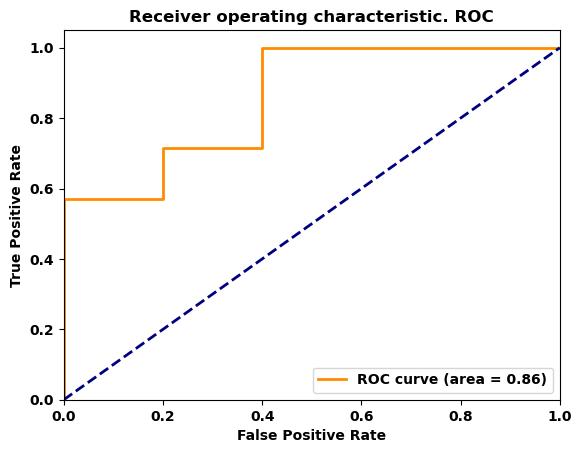

In [5]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC')
plt.legend(loc="lower right")
plt.show()

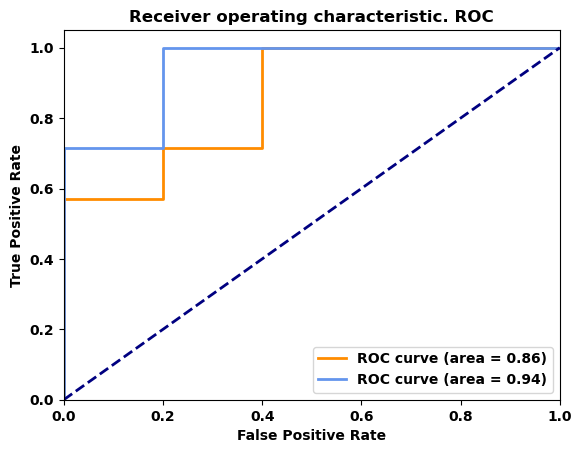

In [6]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, color='cornflowerblue',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC')
plt.legend(loc="lower right")
plt.show()

## Ejercicio en clase: 

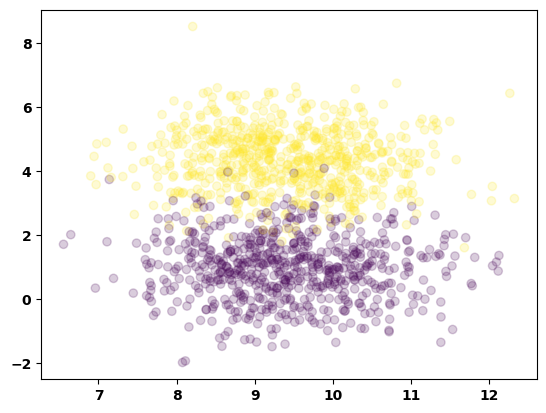

In [7]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
#probar con:
#     n_samples = 1000, centers = 2, n_features=2, shuffle=True, random_state=3
#     
X, y = make_blobs(n_samples = 1000+300, centers = 2, n_features=2, shuffle=True, random_state=4)
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,alpha=0.2)#ver: https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = StandardScaler()# Ejercicio, no use la escalización de los datos a ver que tal funciona!
scaler.fit(X_train)# 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
k_range = range(1, int(np.sqrt(len(y_train))))
#por ejemplo euclidean. manhattan. chebyshev. minkowski. wminkowski. seuclidean. mahalanobis. hamming
#import sklearn
#sorted(sklearn.neighbors.VALID_METRICS['brute'])
distance='minkowski'#podemos hacer un for que recorra las distancias que queremos probar en un enfoque grid-search.

ACC=[]
MCC=[]
TPR=[]
FPR=[]

for k in k_range:#por ahora variemos K, 
    knn = KNeighborsClassifier(n_neighbors = k,weights='distance',metric=distance, metric_params=None,algorithm='brute')
    #knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    #Les toca hacer:
    #Hallar: Accuracy
    ACC.append(knn.score(X_test, y_test))
    #MCC 
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html
    #TPR
    #Ustedes buscan

    #FPR
    #Ustedes buscan


    
    

In [24]:
print(ACC)

[0.9261538461538461, 0.9261538461538461, 0.9384615384615385, 0.9415384615384615, 0.9323076923076923, 0.9323076923076923, 0.9323076923076923, 0.9292307692307692, 0.9323076923076923, 0.9323076923076923, 0.9323076923076923, 0.9353846153846154, 0.9353846153846154, 0.9323076923076923, 0.9323076923076923, 0.9353846153846154, 0.9353846153846154, 0.9353846153846154, 0.9353846153846154, 0.9384615384615385, 0.9384615384615385, 0.9384615384615385, 0.9415384615384615, 0.9415384615384615, 0.9446153846153846, 0.9415384615384615, 0.9476923076923077, 0.9446153846153846, 0.9476923076923077, 0.9446153846153846]


## Crear ROC 